# (AMZN): Amazon.com Inc.

## LSTM

In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from pandas_datareader.data import DataReader
from datetime import datetime
from keras_tqdm import TQDMNotebookCallback

## Got GPU?

In [67]:
import tensorflow as tf
from tensorflow.python.client import device_lib

In [59]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8346425370708760632
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11342560640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4102353972730152085
physical_device_desc: "device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


In [60]:
print(tf.__version__)

2.4.1


In [61]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [62]:
tf.test.is_gpu_available()

True

In [63]:
!python --version

Python 3.8.5


## Get Data

In [6]:
item = 'AMZN'

In [37]:
# Get Data
data = DataReader(item,  "yahoo", datetime(1900,1,1), datetime.now())
data = pd.DataFrame(data)
data.index.name = 'ds'
data.reset_index(inplace=True)
data = data.dropna()
data = data.rename(columns={'Close' : 'y'})
data = data[["ds","y"]]
data

,ds,y
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083
...,...,...
6044,2021-05-21,3203.080078
6045,2021-05-24,3244.989990
6046,2021-05-25,3259.050049
6047,2021-05-26,3265.159912


## Split

In [100]:
trainData = data.tail(-180)
testData = data.tail(180)

## Scaling

In [101]:
sc = MinMaxScaler(feature_range=(0,1))

### Raw

In [102]:
train_y = trainData.iloc[:,1:2].values
test_y = testData.iloc[:,1:2].values
train_y

array([[   5.19791698],
       [   5.15104198],
       [   5.0625    ],
       ...,
       [3259.05004883],
       [3265.15991211],
       [3230.11010742]])

### Scaled 0-1

In [103]:
train_y = sc.fit_transform(train_y)
test_y = sc.fit_transform(test_y)
train_y

array([[9.74736037e-05],
       [8.41817487e-05],
       [5.90748212e-05],
       ...,
       [9.22758400e-01],
       [9.24490910e-01],
       [9.14552202e-01]])

## Batch sizes

In [104]:
X_train = []
y_train = []

for i in range (60,len( train_y )): 
    X_train.append(train_y[i-30:i,0]) 
    y_train.append(train_y[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [105]:
X_train

array([[5.10997893e-04, 6.39485825e-04, 6.08471497e-04, ...,
        6.29147806e-04, 5.78933951e-04, 8.83169835e-04],
       [6.39485825e-04, 6.08471497e-04, 6.08471497e-04, ...,
        5.78933951e-04, 8.83169835e-04, 8.80215999e-04],
       [6.08471497e-04, 6.08471497e-04, 6.04040878e-04, ...,
        8.83169835e-04, 8.80215999e-04, 7.91603632e-04],
       ...,
       [9.62726108e-01, 9.43727616e-01, 9.56796902e-01, ...,
        9.19534294e-01, 9.06887579e-01, 9.18771535e-01],
       [9.43727616e-01, 9.56796902e-01, 9.62567298e-01, ...,
        9.06887579e-01, 9.18771535e-01, 9.22758400e-01],
       [9.56796902e-01, 9.62567298e-01, 9.54789278e-01, ...,
        9.18771535e-01, 9.22758400e-01, 9.24490910e-01]])

In [106]:
y_train

array([8.80215999e-04, 7.91603632e-04, 8.56586124e-04, ...,
       9.22758400e-01, 9.24490910e-01, 9.14552202e-01])

### Batch Size

In [107]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(5809, 30, 1)

# Model

In [130]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

## Fitting

In [137]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=0)

## Performance

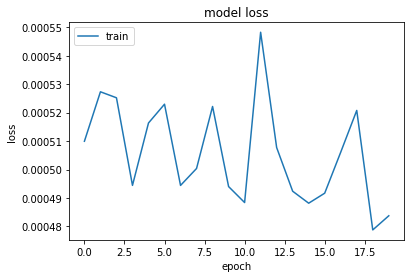

In [138]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Test evaluation

In [141]:
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(test_y[i-timestep:i,0])

In [142]:
X_test = np.array(X_test)
X_test

array([[0.4296829 , 0.3162931 , 0.29078094, ..., 0.51627016, 0.48440393,
        0.45205634],
       [0.3162931 , 0.29078094, 0.3931375 , ..., 0.48440393, 0.45205634,
        0.405557  ],
       [0.29078094, 0.3931375 , 0.24289533, ..., 0.45205634, 0.405557  ,
        0.39673831],
       ...,
       [0.37390231, 0.27453028, 0.10214502, ..., 0.5694122 , 0.48353758,
        0.56423286],
       [0.27453028, 0.10214502, 0.04933016, ..., 0.48353758, 0.56423286,
        0.59130475],
       [0.10214502, 0.04933016, 0.09340342, ..., 0.56423286, 0.59130475,
        0.60306896]])

In [143]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test

array([[[0.4296829 ],
        [0.3162931 ],
        [0.29078094],
        ...,
        [0.51627016],
        [0.48440393],
        [0.45205634]],

       [[0.3162931 ],
        [0.29078094],
        [0.3931375 ],
        ...,
        [0.48440393],
        [0.45205634],
        [0.405557  ]],

       [[0.29078094],
        [0.3931375 ],
        [0.24289533],
        ...,
        [0.45205634],
        [0.405557  ],
        [0.39673831]],

       ...,

       [[0.37390231],
        [0.27453028],
        [0.10214502],
        ...,
        [0.5694122 ],
        [0.48353758],
        [0.56423286]],

       [[0.27453028],
        [0.10214502],
        [0.04933016],
        ...,
        [0.48353758],
        [0.56423286],
        [0.59130475]],

       [[0.10214502],
        [0.04933016],
        [0.09340342],
        ...,
        [0.56423286],
        [0.59130475],
        [0.60306896]]])

In [151]:
X_test.shape

(120, 60, 1)

In [157]:
y_pred = model.predict(X_test) #predicting the new values

In [158]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting 

ValueError: Found array with dim 3. Estimator expected <= 2.

## Plot test

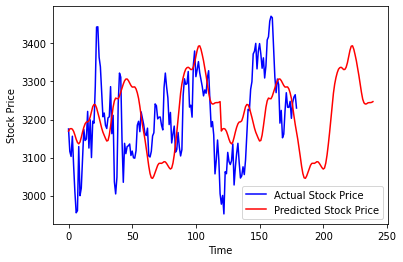

In [154]:
plt.plot(sc.inverse_transform(test_y), color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()